(1427, 2100, 3)


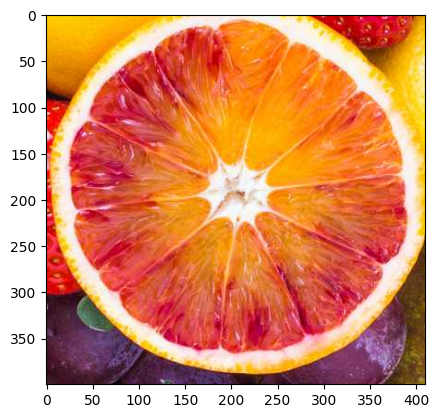

In [9]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]

print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()

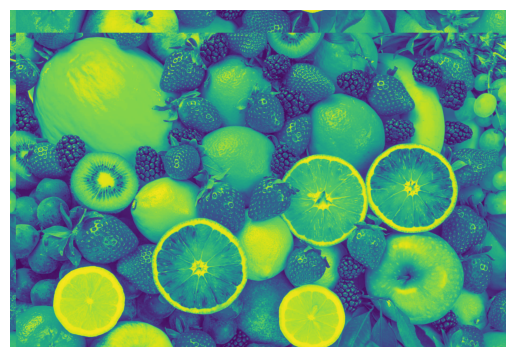

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import scipy.ndimage as nd

data = iio.imread('fruit.jpg', mode='F')
bdata = np.roll(data, shift=(100, 25), axis=(0, 1))


plt.imshow(bdata) 
plt.axis('off')    # Tùy chọn: ẩn trục
plt.show()


(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


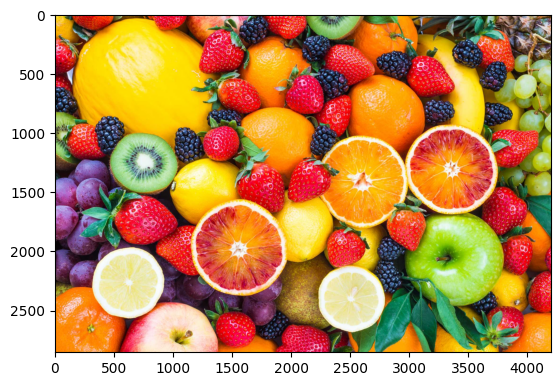

In [17]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

bdata = nd.zoom(data, 2)
print(bdata.shape)

data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)

data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data2)
plt.show()


(1427, 2100, 3)


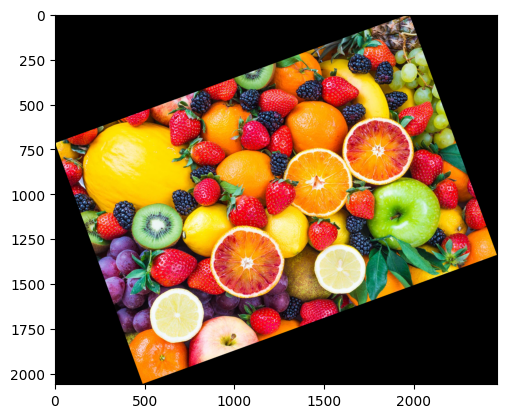

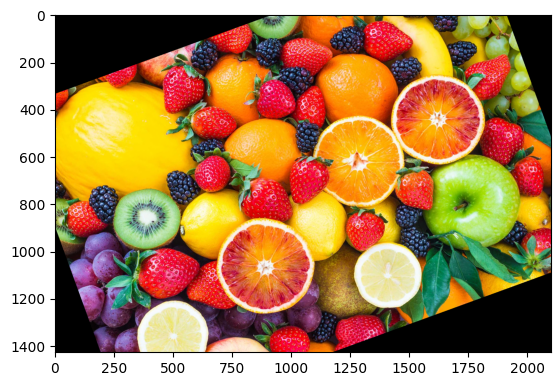

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()


(309, 515)


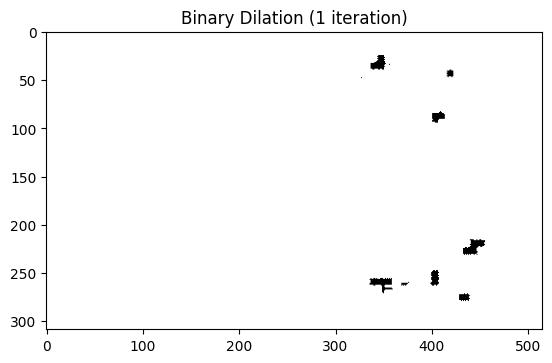

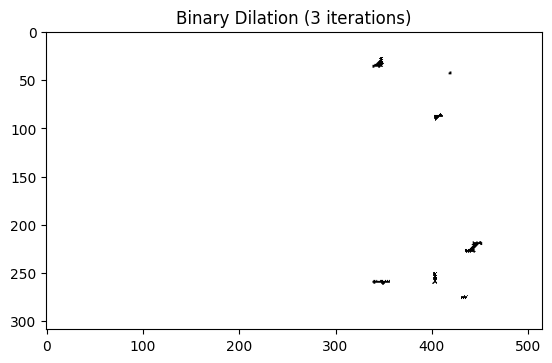

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy import ndimage

# Đọc ảnh mức xám và chuyển thành nhị phân
data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)

# Chuyển ảnh mức xám thành nhị phân (True/False)
binary = data > 0.5

# Dilation 1 lần
d1 = ndimage.binary_dilation(binary)
plt.imshow(d1, cmap='gray')
plt.title("Binary Dilation (1 iteration)")
plt.show()

# Dilation 3 lần
d2 = ndimage.binary_dilation(binary, iterations=3)
plt.imshow(d2, cmap='gray')
plt.title("Binary Dilation (3 iterations)")
plt.show()


(309, 515)


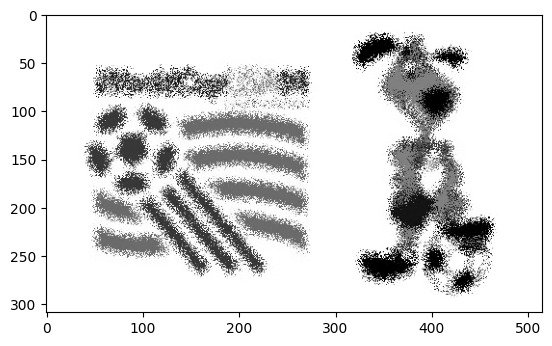

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh grayscale
data = iio.imread('world_cup.jpg', mode='F')
print(data.shape)
V, H = data.shape

# Tạo lưới chỉ số
M = np.indices((V, H)).astype(float)

# Thêm nhiễu ngẫu nhiên
d = 5
q = 2 * d * np.random.rand(*M.shape) - d
mp = M + q

# Ánh xạ tọa độ mới
d1 = nd.map_coordinates(data, mp, order=1, mode='reflect')
plt.imshow(d1, cmap='gray')
plt.show()

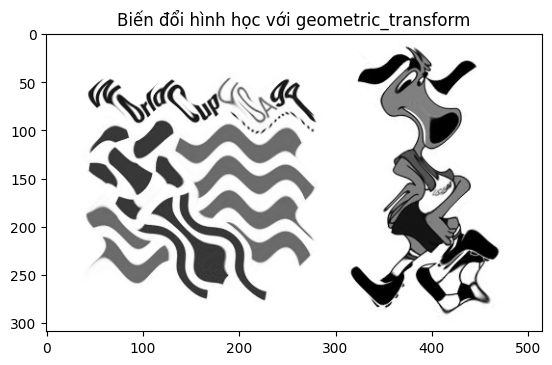

In [ ]:

import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy import ndimage

# Hàm ánh xạ tọa độ ra → vào
def GeoFun(out_coords):
    x, y = out_coords
    new_x = x + 10 * np.cos(y / 10.0)
    new_y = y + 10 * np.cos(x / 10.0)
    return new_x, new_y

# Đọc ảnh xám
data = iio.imread('world_cup.jpg', mode='F')

# Biến đổi hình học
transformed = ndimage.geometric_transform(data, GeoFun, order=1, mode='reflect')

plt.imshow(transformed, cmap='gray')
plt.title("Biến đổi hình học với geometric_transform")
plt.show()



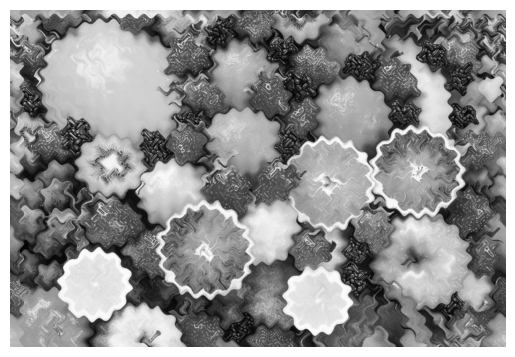

In [27]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd

data = iio.imread('fruit.jpg', mode='F')

shifted = np.roll(data, shift=(30,50), axis=(0,1))

def GeoFun(out_coords):
        x,y = out_coords
        new_x = x + 10 * np.cos(y /10.0)
        new_y = y + 10 * np.sin(x /10.0)
        return new_x, new_y

warped = nd.geometric_transform(shifted, GeoFun, order=1, mode='reflect')

plt.imshow(warped, cmap='gray')
plt.axis('off')
plt.show()    

In [ ]:
import numpy as np
from PIL import Image

papaya = Image.open("dudu.jpg").convert("RGBA")
watermelon = Image.open("duahau.jpg").convert("RGBA")

papaya_np = np.array(papaya)
watermelon_np = np.array(watermelon)


def apply_gradient(image, start_color, end_color):
    h, w, _ = image.shape
    gradient = np.linspace(start_color, end_color, h).astype(np.uint8)
    
   
    new_image = image.copy()
    for y in range(h):
        mask = new_image[y,:,3] > 0  
        new_image[y,mask,:3] = gradient[y,:3]
    return new_image


papaya_gradient = apply_gradient(papaya_np, [255, 0, 0], [0, 255, 0])      
watermelon_gradient = apply_gradient(watermelon_np, [255, 255, 0], [128, 0, 128])  


canvas_w = papaya_gradient.shape[1] + watermelon_gradient.shape[1]
canvas_h = max(papaya_gradient.shape[0], watermelon_gradient.shape[0])
canvas = np.zeros((canvas_h, canvas_w, 4), dtype=np.uint8)


canvas[0:papaya_gradient.shape[0], 0:papaya_gradient.shape[1]] = papaya_gradient


x_offset = papaya_gradient.shape[1]
canvas[0:watermelon_gradient.shape[0], x_offset:x_offset + watermelon_gradient.shape[1]] = watermelon_gradient


final_img = Image.fromarray(canvas, mode='RGBA')
final_img.save("papaya_watermelon_gradient.png")
final_img.imshow( )
final_img.show()


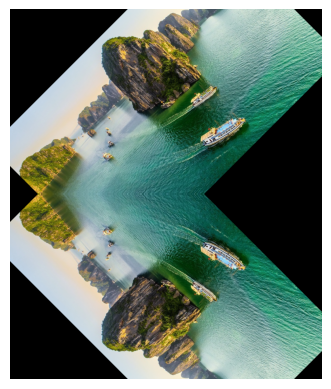

In [12]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# B1 : Đọc ảnh
pic1 = iio.imread('exercise/quang_ninh.jpg')
# B2 : Xoay mỗi ảnh 45 độ, giữ kích thước (reshape=False )
pic1_rot = nd.rotate(pic1, 45, reshape=False)
# B3 : Tạo ảnh phản chiếu dọc
pic1_mirror = np.flipud(pic1_rot)

# B4 : Ghép 2 ảnh vào canvas trắng
h, w ,c = pic1_mirror.shape


canvas = np.ones((h * 2, w, 3), dtype=np.uint8)* 255

canvas[0:h, :] = pic1_rot
canvas[h:h*2,:] = pic1_mirror

iio.imwrite('quang_ninh_mirror.jpg', canvas)

plt.imshow(canvas)
plt.axis('off')
plt.show()


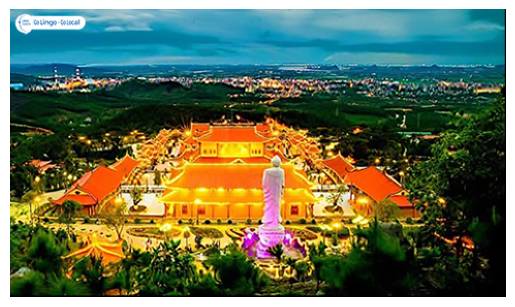

In [19]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# B1 : Đọc ảnh
img = iio.imread('exercise/pagoda.jpg')

# B2 : Phóng to ảnh 
img_zoom = nd.zoom(img, (5,5,1))

# B3 : biến đổi hình học tuỳ chọn 
def GeoFun(outcoord):
    a = 10 * np.sin(outcoord[0] / 30.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1] / 30.0) + outcoord[1]
    return a,b

# Bước 4: Áp dụng biến đổi hình học
warped = np.zeros_like(img_zoom)
for i in range(3):
    warped[..., i] = nd.geometric_transform(img_zoom[..., i], GeoFun, order = 1)

iio.imwrite('Pagoda_warped.jpg', warped)
plt.imshow(warped)
plt.axis('off')
plt.show()


Chọn ảnh: 
1.fruit.jpg
2.world_cup.jpg
3.exercise/colorful-ripe-tropical-fruits.jpg

Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to / thu nhỏ
4. Làm mờ Gaussian
5. Biến đổi sóng


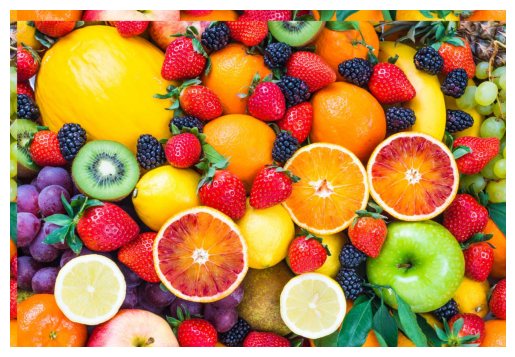

Ảnh đã được lưu thành: output_result.jpg


In [24]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def show(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

# tịnh tiến
def translate_image(img):
    dx = int(input("Nhập số pixel tịnh tiến theo X: "))
    dy = int(input("Nhập số pixel tịnh tiến theo Y: "))
    return np.roll(img, shift=(dx,dy), axis=(0,1))

# xoay
def rotate_image(img):
    angle = float(input("Nhập góc xoay: "))
    reshape = input("Giữ nguyên kích thước? (y/n)").lower() == 'y'
    return nd.rotate(img, angle, reshape=reshape)

# hàm phóng to thu nhỏ
def zoom_image(img):
    try:
        if len(img.shape) == 2:
            zx = float(input("Nhập hệ số zoom theo chiều cao: "))
            zy = float(input("Nhập hệ số zoom theo chiều rộng: "))
            return nd.zoom(img, (zx, zy))
        else:
            zx = float(input("Nhập hệ số zoom theo chiều cao: "))
            zy = float(input("Nhập hệ số zoom theo chiều rộng: "))
            return nd.zoom(img, (zx, zy, 1))
    except:
        print("Hệ số zoom không hợp lệ")
        return img

# hàm làm mờ
def gaussian_blur(img):
    sigma = float(input("Nhập giá trị sigma(mức độ làm mờ): "))
    return nd.gaussian_filter(img, sigma= sigma)

# hàm biến đổi sóng
def wave_transform(img):
    A = float(input("Nhập biên độ sóng (ví dụ 10): "))

    def GeoFun(out_coords):
        x,y = out_coords
        new_x = x + A * np.cos(y /10.0)
        new_y = y + A * np.cos(x /10.0)
        return new_x, new_y
    
    if len(img.shape) == 2:
        return nd.geometric_transform(img, GeoFun, order=1, mode='reflect')
    else:
        result = np.zeros_like(img)
        for i in range(3):
            result[...,i] = nd.geometric_transform(img[...,i],GeoFun, order=1, mode='reflect')
        return result

img_list = ['fruit.jpg', 'world_cup.jpg', 'exercise/colorful-ripe-tropical-fruits.jpg']
print("Chọn ảnh: ")
for idx, name in enumerate(img_list):
    print(f"{idx+1}.{name}")

choice = int(input("Nhập số thứ tự (1-3): "))
img_path = img_list[choice -1]

mode = input("Đọc ảnh dạng graysclae? (y/n): ").lower()
if mode == 'y':
    img = iio.imread(img_path, mode='F')  # grayscale
    cmap = 'gray'
else:
    img = iio.imread(img_path)
    cmap = None

print("\nChọn phép biến đổi:")
print("1. Tịnh tiến")
print("2. Xoay")
print("3. Phóng to / thu nhỏ")
print("4. Làm mờ Gaussian")
print("5. Biến đổi sóng")

op = int(input("Nhập số phép biến đổi (1-5): "))

if op == 1:
    out = translate_image(img)
elif op == 2:
    out = rotate_image(img)
elif op == 3:
    out = rotate_image(img)
elif op == 4:
    out = gaussian_blur(img)
elif op == 5:
    out = wave_transform(img)
else:
    print("lựa chọn ko hợp lệ")
    exit()

show(out, cmap)
iio.imwrite("output_result.jpg", out)
print("Ảnh đã được lưu thành: output_result.jpg")